In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [26]:
co2_data=sm.datasets.co2.load_pandas()

In [27]:
co2_data=co2_data.data
co2_data

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


weekly data to monthly

In [33]:
co2_data.shape

(2284, 1)

In [28]:
y = co2_data.co2.resample("MS").mean()

In [29]:
y

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

In [31]:
y.isnull().sum()

5

In [32]:
y["1990":]

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
               ...   
2001-08-01    369.425
2001-09-01    367.880
2001-10-01    368.050
2001-11-01    369.375
2001-12-01    371.020
Freq: MS, Name: co2, Length: 144, dtype: float64

In [38]:
y.fillna(y.bfill(),inplace=True)   # bfil is used for filling previous values of na values

In [39]:
y.isnull().sum()

0

# vizulation of time series

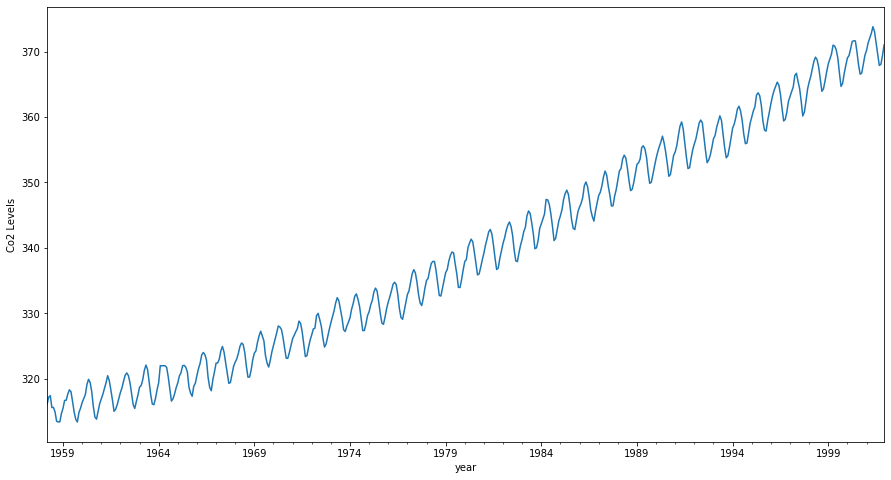

In [42]:
y.plot(figsize=(15,8))
plt.xlabel("year")
plt.ylabel("Co2 Levels")
plt.show()
# seasonality, trend and noice can be seen

In [43]:
from pylab import rcParams

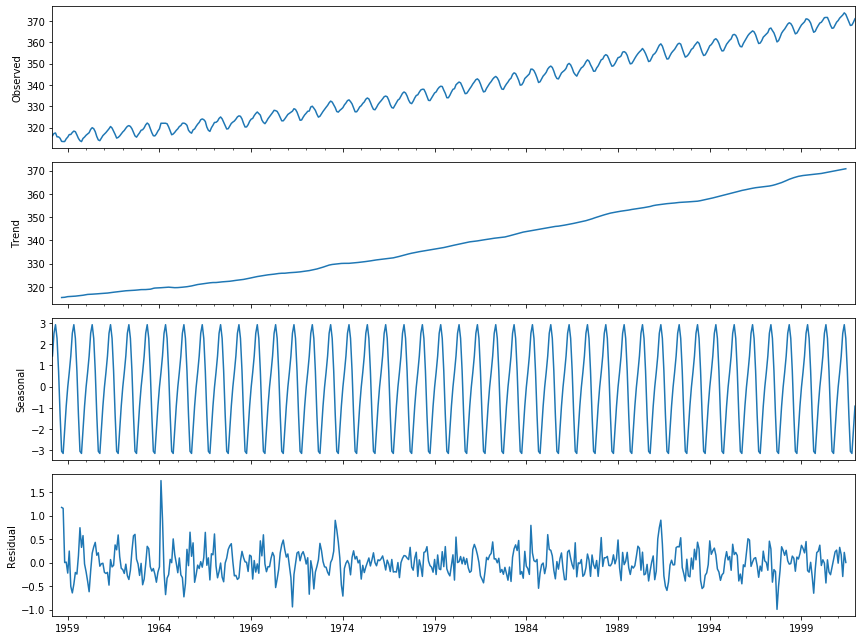

In [45]:
rcParams["figure.figsize"]=12,9
decomposition = sm.tsa.seasonal_decompose(y,model="additive")
fig = decomposition.plot()
plt.show()

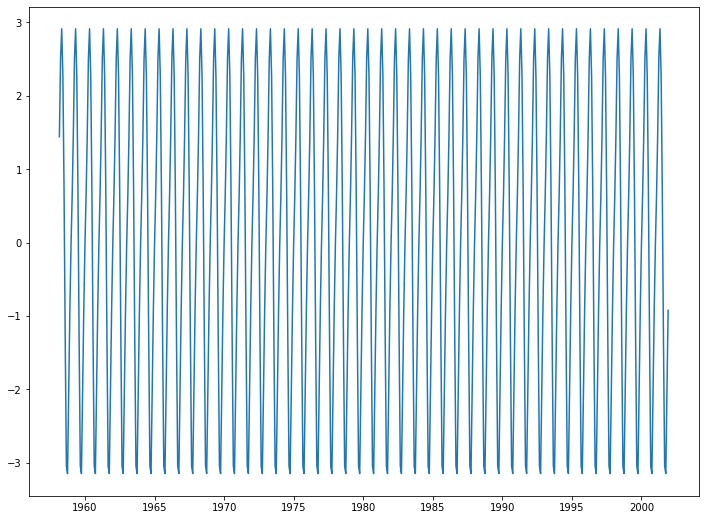

In [47]:
plt.plot(decomposition.seasonal)
plt.show()

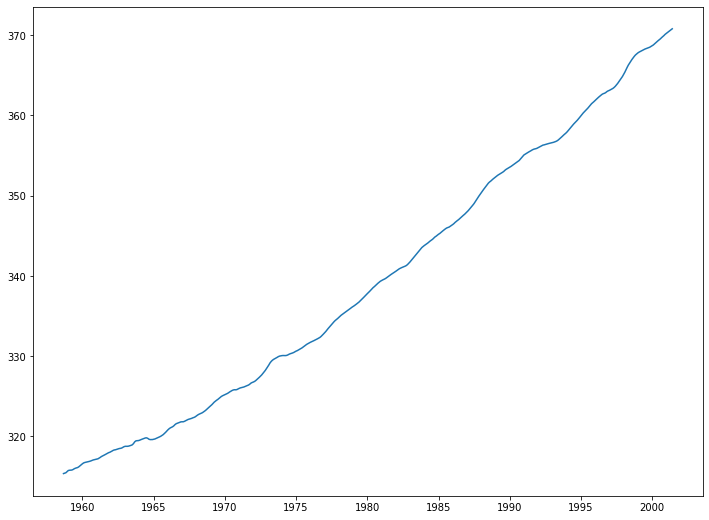

In [48]:
plt.plot(decomposition.trend)

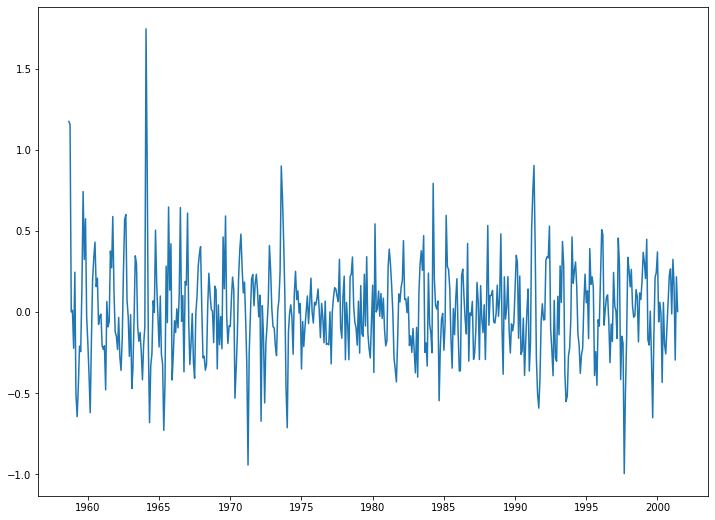

In [49]:
plt.plot(decomposition.resid)

In [50]:
decomposition.nobs

526

In [51]:
p=d=q=range(0,2)

In [52]:
p,d,q

(range(0, 2), range(0, 2), range(0, 2))

In [53]:
import itertools

In [54]:
pdq = list(itertools.product(p,d,q))

In [55]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [56]:
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [57]:
print("Examples of parameters combnations for seasonal ARIMA..")
print("SARIMA: {}*{}".format(pdq[1],seasonal_pdq[1]))
print("SARIMA: {}*{}".format(pdq[1],seasonal_pdq[2]))
print("SARIMA: {}*{}".format(pdq[2],seasonal_pdq[3]))
print("SARIMA: {}*{}".format(pdq[2],seasonal_pdq[4]))

Examples of parameters combnations for seasonal ARIMA..
SARIMA: (0, 0, 1)*(0, 0, 1, 12)
SARIMA: (0, 0, 1)*(0, 1, 0, 12)
SARIMA: (0, 1, 0)*(0, 1, 1, 12)
SARIMA: (0, 1, 0)*(1, 0, 0, 12)


In [59]:
for i in pdq:
    for j in seasonal_pdq:
        model =sm.tsa.statespace.SARIMAX(y,order=i,seasonal_order=j,enforce_invertibility=False,enforce_stationarity=False)
        results = model.fit()
        print("SARIMAX{}X{}12-AIC {}".format(i,j,results.aic))

SARIMAX(0, 0, 0)X(0, 0, 0, 12)12-AIC 7612.583429881011
SARIMAX(0, 0, 0)X(0, 0, 1, 12)12-AIC 6787.343624036742
SARIMAX(0, 0, 0)X(0, 1, 0, 12)12-AIC 1854.828234141261
SARIMAX(0, 0, 0)X(0, 1, 1, 12)12-AIC 1596.7111727636197
SARIMAX(0, 0, 0)X(1, 0, 0, 12)12-AIC 1058.9388921320026
SARIMAX(0, 0, 0)X(1, 0, 1, 12)12-AIC 1056.287840438874
SARIMAX(0, 0, 0)X(1, 1, 0, 12)12-AIC 1361.6578978072075
SARIMAX(0, 0, 0)X(1, 1, 1, 12)12-AIC 1044.7647912934656
SARIMAX(0, 0, 1)X(0, 0, 0, 12)12-AIC 6881.048755206244
SARIMAX(0, 0, 1)X(0, 0, 1, 12)12-AIC 6072.662327721806
SARIMAX(0, 0, 1)X(0, 1, 0, 12)12-AIC 1379.1941066918753
SARIMAX(0, 0, 1)X(0, 1, 1, 12)12-AIC 1241.4174716848045


C:\Users\Tejas\new\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX(0, 0, 1)X(1, 0, 0, 12)12-AIC 1089.8231627047912


C:\Users\Tejas\new\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX(0, 0, 1)X(1, 0, 1, 12)12-AIC 865.7138827229446
SARIMAX(0, 0, 1)X(1, 1, 0, 12)12-AIC 1119.5957893632262
SARIMAX(0, 0, 1)X(1, 1, 1, 12)12-AIC 807.0912987990464
SARIMAX(0, 1, 0)X(0, 0, 0, 12)12-AIC 1675.8086923024293
SARIMAX(0, 1, 0)X(0, 0, 1, 12)12-AIC 1240.2211199194085
SARIMAX(0, 1, 0)X(0, 1, 0, 12)12-AIC 633.4425586468699
SARIMAX(0, 1, 0)X(0, 1, 1, 12)12-AIC 337.7938545681309
SARIMAX(0, 1, 0)X(1, 0, 0, 12)12-AIC 619.9501759055394
SARIMAX(0, 1, 0)X(1, 0, 1, 12)12-AIC 376.92837596947044
SARIMAX(0, 1, 0)X(1, 1, 0, 12)12-AIC 478.3296906672489
SARIMAX(0, 1, 0)X(1, 1, 1, 12)12-AIC 323.0775885621347
SARIMAX(0, 1, 1)X(0, 0, 0, 12)12-AIC 1371.1872602335384
SARIMAX(0, 1, 1)X(0, 0, 1, 12)12-AIC 1101.8410734303889
SARIMAX(0, 1, 1)X(0, 1, 0, 12)12-AIC 587.9479710210211
SARIMAX(0, 1, 1)X(0, 1, 1, 12)12-AIC 302.4949000361645
SARIMAX(0, 1, 1)X(1, 0, 0, 12)12-AIC 584.4333533404157
SARIMAX(0, 1, 1)X(1, 0, 1, 12)12-AIC 337.1999050224538
SARIMAX(0, 1, 1)X(1, 1, 0, 12)12-AIC 433.08636081546194
SAR

C:\Users\Tejas\new\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX(1, 0, 0)X(0, 0, 1, 12)12-AIC 1241.9354689077231
SARIMAX(1, 0, 0)X(0, 1, 0, 12)12-AIC 624.2602350563734
SARIMAX(1, 0, 0)X(0, 1, 1, 12)12-AIC 341.2896614058179
SARIMAX(1, 0, 0)X(1, 0, 0, 12)12-AIC 579.3896901160358
SARIMAX(1, 0, 0)X(1, 0, 1, 12)12-AIC 370.5920473327732
SARIMAX(1, 0, 0)X(1, 1, 0, 12)12-AIC 476.0500429124218
SARIMAX(1, 0, 0)X(1, 1, 1, 12)12-AIC 329.58449918088866
SARIMAX(1, 0, 1)X(0, 0, 0, 12)12-AIC 1372.608588161736
SARIMAX(1, 0, 1)X(0, 0, 1, 12)12-AIC 1199.4888163654723
SARIMAX(1, 0, 1)X(0, 1, 0, 12)12-AIC 586.4485732991755
SARIMAX(1, 0, 1)X(0, 1, 1, 12)12-AIC 305.6273830214444


C:\Users\Tejas\new\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX(1, 0, 1)X(1, 0, 0, 12)12-AIC 586.2742224341966
SARIMAX(1, 0, 1)X(1, 0, 1, 12)12-AIC 400.2377802567448
SARIMAX(1, 0, 1)X(1, 1, 0, 12)12-AIC 433.5469464689324
SARIMAX(1, 0, 1)X(1, 1, 1, 12)12-AIC 285.7463824200595
SARIMAX(1, 1, 0)X(0, 0, 0, 12)12-AIC 1324.311112732457


C:\Users\Tejas\new\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX(1, 1, 0)X(0, 0, 1, 12)12-AIC 1060.935191442204
SARIMAX(1, 1, 0)X(0, 1, 0, 12)12-AIC 600.7412682874252
SARIMAX(1, 1, 0)X(0, 1, 1, 12)12-AIC 312.1329632361338
SARIMAX(1, 1, 0)X(1, 0, 0, 12)12-AIC 593.6637754853627
SARIMAX(1, 1, 0)X(1, 0, 1, 12)12-AIC 349.2091458827515
SARIMAX(1, 1, 0)X(1, 1, 0, 12)12-AIC 440.1375884358338
SARIMAX(1, 1, 0)X(1, 1, 1, 12)12-AIC 293.7426222758842
SARIMAX(1, 1, 1)X(0, 0, 0, 12)12-AIC 1262.654554246476
SARIMAX(1, 1, 1)X(0, 0, 1, 12)12-AIC 1052.0636724060043
SARIMAX(1, 1, 1)X(0, 1, 0, 12)12-AIC 581.3099934782217
SARIMAX(1, 1, 1)X(0, 1, 1, 12)12-AIC 295.9374060255953
SARIMAX(1, 1, 1)X(1, 0, 0, 12)12-AIC 576.8647111601883
SARIMAX(1, 1, 1)X(1, 0, 1, 12)12-AIC 327.9049130881351
SARIMAX(1, 1, 1)X(1, 1, 0, 12)12-AIC 444.12436865141757
SARIMAX(1, 1, 1)X(1, 1, 1, 12)12-AIC 277.7803859470064


In [79]:
model=sm.tsa.statespace.SARIMAX(y,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False,enforce_stationarity=False)
results = model.fit()

In [80]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                co2   No. Observations:                  526
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -133.890
Date:                            Sun, 16 Feb 2020   AIC                            277.780
Time:                                    12:40:10   BIC                            298.843
Sample:                                03-01-1958   HQIC                           286.046
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.446      0.001       0.137       0.499
ma.L1         -0.6256      0.076   

In [81]:
print(results.summary().tables[0])

                                 Statespace Model Results                                 
Dep. Variable:                                co2   No. Observations:                  526
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -133.890
Date:                            Sun, 16 Feb 2020   AIC                            277.780
Time:                                    12:40:10   BIC                            298.843
Sample:                                03-01-1958   HQIC                           286.046
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         


In [82]:
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.446      0.001       0.137       0.499
ma.L1         -0.6256      0.076     -8.178      0.000      -0.776      -0.476
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8767      0.026    -33.777      0.000      -0.928      -0.826
sigma2         0.0971      0.004     22.639      0.000       0.089       0.106


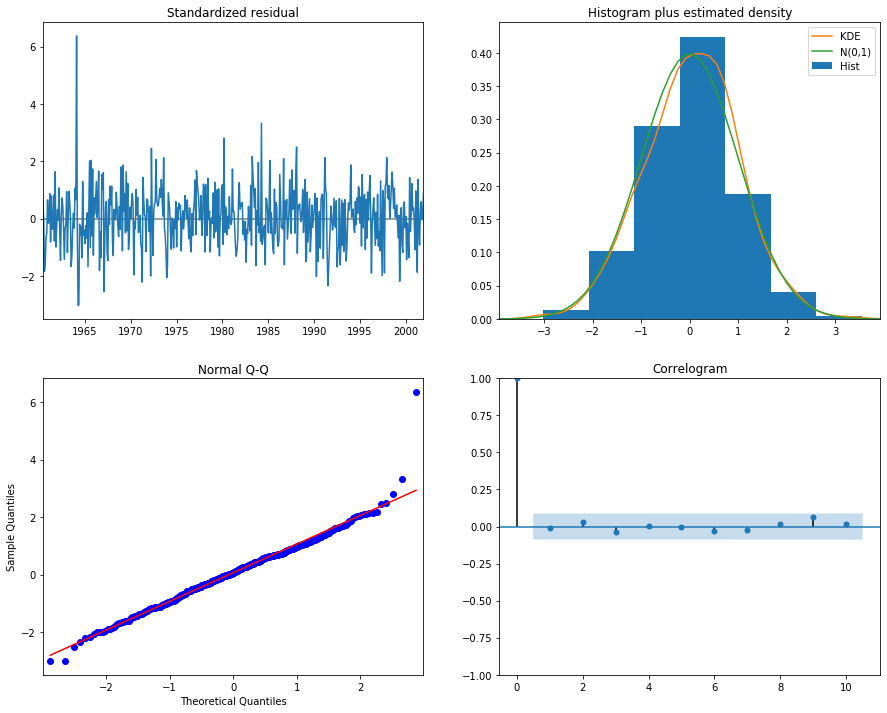

In [83]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

# forcasting the values

In [84]:
pred = results.get_prediction(start=pd.to_datetime("1998-01-01"),dynamic=False)
pred_ci = pred.conf_int()

In [88]:
pred_ci

,lower co2,upper co2
1998-01-01,364.453389,365.675032
1998-02-01,365.373516,366.595159
1998-03-01,366.404687,367.626330
1998-04-01,367.908538,369.130180
1998-05-01,368.389539,369.611181
1998-06-01,367.802412,369.024054
1998-07-01,366.481908,367.703550
1998-08-01,364.754070,365.975711
1998-09-01,363.199779,364.421421
1998-10-01,363.378575,364.600217


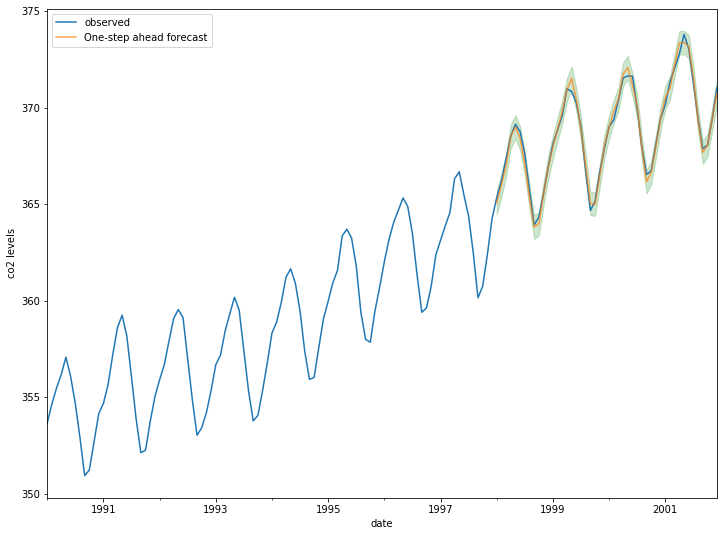

In [91]:
ax = y["1990":].plot(label="observed")
pred.predicted_mean.plot(ax=ax,label="One-step ahead forecast",alpha=.7)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color="green",
               alpha=.2)

ax.set_xlabel("date")
ax.set_ylabel("co2 levels")
plt.legend()
plt.show()

# mse

In [92]:
y_forecasted = pred.predicted_mean

In [93]:

y_tryth = y["1998-01-01":]

In [94]:
mse = ((y_forecasted-y_tryth)**2).mean()

In [95]:
mse

0.07303006115955386

In [96]:
pred = results.get_prediction(start=pd.to_datetime("1998-01-01"),dynamic=True)
pred_ci = pred.conf_int()

In [97]:
pred_ci

,lower co2,upper co2
1998-01-01,364.453389,365.675032
1998-02-01,365.050343,366.536341
1998-03-01,365.875091,367.529185
1998-04-01,367.090877,368.882540
1998-05-01,367.550871,369.465961
1998-06-01,366.824454,368.854206
1998-07-01,365.235010,367.372898
1998-08-01,363.143247,365.383943
1998-09-01,361.355866,363.694820
1998-10-01,361.462751,363.895988


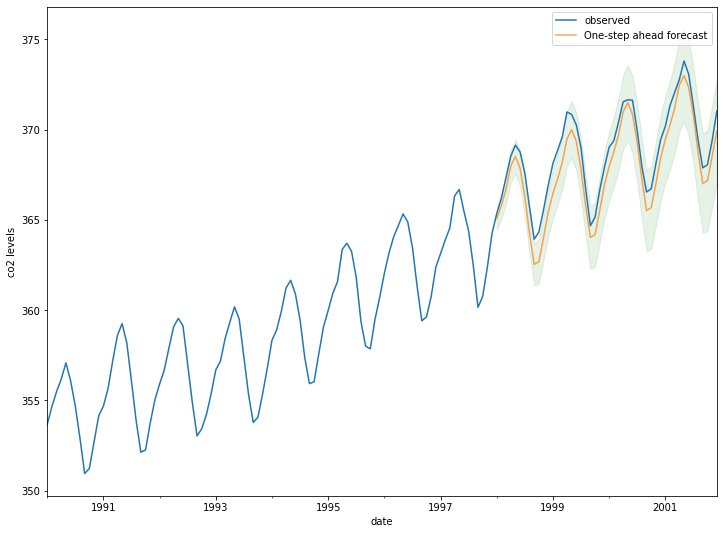

In [101]:
ax = y["1990":].plot(label="observed")
pred.predicted_mean.plot(ax=ax,label="One-step ahead forecast",alpha=.7)

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color="green",
               alpha=.1)

ax.set_xlabel("date")
ax.set_ylabel("co2 levels")
plt.legend()
plt.show()

In [99]:
y_forecasted = pred.predicted_mean
y_tryth = y["1998-01-01":]
mse = ((y_forecasted-y_tryth)**2).mean()
mse

1.00968117591188

In [102]:
pred_uc = results.get_forecast(steps=500)
pred_ci = pred_uc.conf_int()

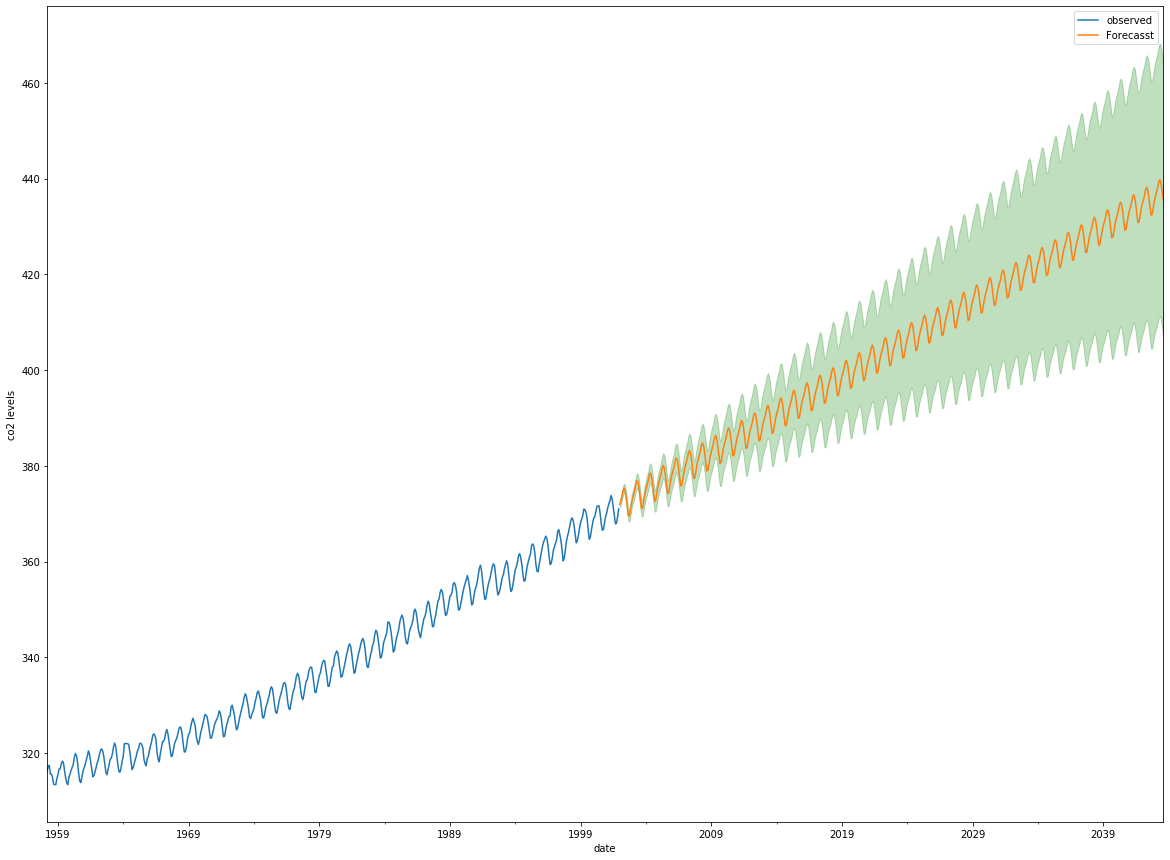

In [106]:
ax = y.plot(label="observed",figsize=(20,15))
pred_uc.predicted_mean.plot(ax=ax,label="Forecasst")

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color="green",
               alpha=.25)

ax.set_xlabel("date")
ax.set_ylabel("co2 levels")
plt.legend()
plt.show()